# Clase 11 de noviembre de 2020
## Ejemplos T-Test de una muestra
## Ejemplos T-Test de dos muestras
## Ejemplos T-Test Pareados
## Ejemplos Independencia datos cualitativos
### Test de Inepdencia $\chi^2$
## Anova

In [5]:
## Librerias

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [6]:
## Genreamos una semilla aleatoria
np.random.seed(1)

In [7]:
poblacion1=stats.poisson.rvs(loc=18,mu=35,size=450000)
poblacion2=stats.poisson.rvs(loc=18,mu=15,size=150000)
España=np.concatenate((poblacion1, poblacion2))

In [8]:
Granada1 = stats.poisson.rvs(loc=18, mu=35, size=30)
Granada2 = stats.poisson.rvs(loc=18, mu=14, size=20)
Granada = np.concatenate((Granada1, Granada2))

In [9]:
print( España.mean() )
print( Granada.mean() )

47.988895
45.2


$$\begin{array}{cc}
H_0: & \mu_G=\mu_{ES}\\
H_1: & \mu_G\neq\mu_{ES} 
\end{array}$$

In [10]:
estadistico, p_Valor=stats.ttest_1samp(Granada,España.mean())

if p_Valor<0.05:
    print("Rechazamos Hipotesis Nula")
else:
    print("Aceptamos Hipotesis Nula")


Aceptamos Hipotesis Nula


### T-Test de dos muestras

$$\begin{array}{cc}
H_0: & \mu_G=\mu_{Ma}\\
H_1: & \mu_G\neq\mu_{Ma} 
\end{array}$$

In [11]:
Madrid1 = stats.poisson.rvs(loc=18, mu=34, size=120)
Madrid2 = stats.poisson.rvs(loc=18, mu=13, size=80)
Madrid = np.concatenate((Madrid1, Madrid2))

In [12]:
stats.ttest_ind(Granada,Madrid,equal_var=False)

Ttest_indResult(statistic=0.9346960995394972, pvalue=0.3529398654301582)

### T- Test Pareado

In [13]:
np.random.seed(234)

peso_precovid=stats.norm.rvs(scale=30,loc=250,size=1000)
peso_postcovid=peso_precovid + stats.norm.rvs(scale=10,loc=1.25,size=1000)

In [14]:
Peso=pd.DataFrame({"peso_precovid":peso_precovid,
                   "peso_postcovid":peso_postcovid,
                   "Cambio de peso":-peso_precovid+peso_postcovid                  
                  })

In [15]:
Peso.describe()

,peso_precovid,peso_postcovid,Cambio de peso
count,1000.000000,1000.000000,1000.000000
mean,250.085520,251.244027,1.158506
std,30.324344,31.953647,10.112285
min,137.798281,126.257583,-29.798163
25%,230.177244,229.789843,-5.973713
50%,250.550752,251.364715,0.991133
75%,269.294031,272.720401,8.365497
max,362.560614,370.916951,32.419810


In [16]:
stats.ttest_rel(peso_precovid,peso_postcovid)

Ttest_relResult(statistic=-3.622839108433472, pvalue=0.00030605398934524964)

## Datos Cualitativos

In [17]:
Nacional = pd.DataFrame(["Matematicas"]*100000 + ["Educacion Fisica"]*60000 +\
                        ["Lengua"]*50000 + ["Ingles"]*15000 + ["Otras"]*35000)


Granada=pd.DataFrame(["Matematicas"]*600 + ["Educacion Fisica"]*300 +\
                        ["Lengua"]*250 + ["Ingles"]*75 + ["Otras"]*150)

In [18]:
Tabla_Nacional = pd.crosstab(index=Nacional[0], columns="Recuento")
Tabla_Granada = pd.crosstab(index=Granada[0], columns="Recuento")

print(Tabla_Nacional)
print(" ")

print(Tabla_Granada)

col_0             Recuento
0                         
Educacion Fisica     60000
Ingles               15000
Lengua               50000
Matematicas         100000
Otras                35000
 
col_0             Recuento
0                         
Educacion Fisica       300
Ingles                  75
Lengua                 250
Matematicas            600
Otras                  150


el test $\chi^2$

$$\begin{equation}
\sum{\frac{(\text{Observados}-\text{Esperado})^2 }{\text{Esperado}}}
\end{equation}$$

In [19]:
Observado=Tabla_Granada

Ratios=Tabla_Nacional/len(Nacional)
Esperado=Ratios*len(Granada)

In [20]:
print(Esperado)

col_0               Recuento
0                           
Educacion Fisica  317.307692
Ingles             79.326923
Lengua            264.423077
Matematicas       528.846154
Otras             185.096154


In [21]:
chi_cuadrado=((Observado-Esperado)**2/Esperado).sum()
print(chi_cuadrado)

col_0
Recuento    18.194805
dtype: float64


In [22]:
valor_Critico=stats.chi2.ppf(q=0.95,
                            df=4)
print(valor_Critico)

9.487729036781154


In [23]:
p_valor=1-stats.chi.cdf(x=chi_cuadrado,df=4)
print(p_valor)

[0.]


In [24]:
stats.chisquare(Observado, Esperado)

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

## Doble Entrada

In [25]:
np.random.seed(321)

In [26]:
voto_Estado=np.random.choice(a=["Michigan","Pensilvania","Texas","Arizona","California"],
                             p=[0.15,0.15,0.25,0.1,0.35],
                             size=10000)

voto_partido=np.random.choice(a=["Democrata","Liberales","Republicano"],
                              p=[0.45,0.15,0.4],
                              size=10000)



In [27]:
votos_tab=pd.crosstab(voto_Estado,voto_partido,margins=True)
votos_tab.columns=["Democrata","Liberales","Republicano","Suma_Fila"]
votos_tab.index=["Michigan","Pensilvania","Texas","Arizona","California","Suma_Columna"]
print(votos_tab)

              Democrata  Liberales  Republicano  Suma_Fila
Michigan            451        150          412       1013
Pensilvania        1553        522         1411       3486
Texas               685        235          566       1486
Arizona             746        215          549       1510
California         1124        377         1004       2505
Suma_Columna       4559       1499         3942      10000


La idea de outer

$$(a_0,a_1,a_2)\times(b_0,b_1,b_2)= 
\begin{pmatrix}
a_0*b_0 & a_0*b_1 & a_0*b_2 \\
a_1*b_0 & a_1*b_1 & a_1*b_2 \\
a_2*b_0 & a_2*b_1 & a_2*b_2 
\end{pmatrix}$$

In [28]:
4559*1013/10000

461.8267

In [29]:
esperados=np.outer(votos_tab["Suma_Fila"][0:5],votos_tab.loc["Suma_Columna"][0:3])/10000

In [30]:
esperados=pd.DataFrame(esperados)


In [31]:
esperados.columns=["Democrata","Liberales","Republicano"]
esperados.index=["Michigan","Pensilvania","Texas","Arizona","California"]
esperados

,Democrata,Liberales,Republicano
Michigan,461.8267,151.8487,399.3246
Pensilvania,1589.2674,522.5514,1374.1812
Texas,677.4674,222.7514,585.7812
Arizona,688.4090,226.3490,595.2420
California,1142.0295,375.4995,987.4710


In [32]:
observados=votos_tab.iloc[0:5,0:3]

In [33]:
 ((observados-esperados)**2/esperados).sum().sum()

13.465287892366476

In [34]:
critico=stats.chi2.ppf(0.95,8)
print(critico)

15.50731305586545


In [35]:
p_valor=1-stats.chi2.cdf(((observados-esperados)**2/esperados).sum().sum(),8)
print(p_valor)

0.09681183469723353


In [36]:
stats.chi2_contingency(observados)

(13.465287892366478,
 0.0968118346972335,
 8,
 array([[ 461.8267,  151.8487,  399.3246],
        [1589.2674,  522.5514, 1374.1812],
        [ 677.4674,  222.7514,  585.7812],
        [ 688.409 ,  226.349 ,  595.242 ],
        [1142.0295,  375.4995,  987.471 ]]))

# ANOVA

In [37]:
np.random.seed(345)


Peliculas=["Senor_Anillos","Star_Wars","Gladiator","Vengadores","Caballero_Oscuro"]


voto_pelicula=np.random.choice(a=Peliculas,
                              p=[0.1,0.2,0.2,0.15,0.35],
                              size=1000)

voto_Edad= stats.poisson.rvs(loc=18,
                            mu=25,
                            size=1000)

votos_df=pd.DataFrame({"Peliculas":voto_pelicula,
                      "Edad":voto_Edad})






In [38]:
grupos_df=votos_df.groupby('Peliculas').groups
print(grupos_df)

{'Caballero_Oscuro': [1, 6, 13, 14, 19, 20, 24, 32, 34, 35, 38, 39, 41, 42, 44, 49, 52, 55, 58, 59, 63, 67, 68, 74, 77, 79, 86, 87, 90, 93, 98, 103, 104, 106, 107, 109, 112, 118, 119, 120, 121, 124, 127, 130, 131, 132, 134, 135, 138, 142, 143, 144, 152, 156, 157, 158, 161, 163, 164, 165, 173, 174, 175, 177, 178, 179, 185, 191, 194, 198, 201, 205, 211, 213, 214, 217, 218, 222, 228, 229, 231, 234, 240, 242, 244, 251, 252, 255, 262, 266, 278, 281, 283, 284, 289, 292, 293, 294, 296, 297, ...], 'Gladiator': [0, 2, 5, 7, 26, 27, 30, 45, 46, 50, 51, 56, 61, 71, 76, 78, 80, 81, 89, 91, 95, 96, 100, 102, 111, 113, 115, 126, 139, 141, 147, 150, 151, 155, 167, 170, 186, 188, 195, 196, 202, 203, 208, 216, 219, 220, 224, 233, 249, 259, 260, 261, 265, 268, 270, 271, 273, 274, 285, 295, 302, 303, 304, 308, 313, 314, 321, 323, 326, 335, 339, 342, 343, 347, 352, 365, 369, 373, 376, 382, 384, 388, 410, 425, 426, 427, 430, 431, 432, 437, 447, 451, 456, 462, 467, 468, 472, 474, 480, 485, ...], 'Senor_Anil

Extraemos los diferentes grupos

In [39]:
Senor_Anillos=voto_Edad[grupos_df["Senor_Anillos"]]
Star_Wars=voto_Edad[grupos_df["Star_Wars"]]
Gladiator=voto_Edad[grupos_df["Gladiator"]]
Vengadores=voto_Edad[grupos_df["Vengadores"]]
Caballero_Oscuro=voto_Edad[grupos_df["Caballero_Oscuro"]]

In [40]:
stats.f_oneway(Senor_Anillos,Star_Wars,Gladiator,Vengadores,Caballero_Oscuro)

F_onewayResult(statistic=0.5343920055080505, pvalue=0.710501147706021)

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [42]:
model=ols('Edad~Peliculas',
   data=votos_df).fit()

In [43]:
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
Peliculas,53.379931,4.0,0.534392,0.710501
Residual,24847.411069,995.0,NaN,NaN


In [44]:
Wars_Edad=stats.poisson.rvs(loc=18,mu=28,size=1000)
voto_Edad= stats.poisson.rvs(loc=18,
                            mu=25,
                            size=1000)
voto_Edad=np.where(voto_pelicula=="Star_Wars",Wars_Edad,voto_Edad)

In [45]:
votos_df=pd.DataFrame({"Peliculas":voto_pelicula,
                      "Edad":voto_Edad})

In [46]:
model1=ols('Edad~Peliculas',
   data=votos_df).fit()
sm.stats.anova_lm(model1,typ=2)

,sum_sq,df,F,PR(>F)
Peliculas,1685.241313,4.0,15.673786,1.913277e-12
Residual,26745.533687,995.0,NaN,NaN


In [47]:
parejas=[]

In [48]:
for Pelicula1 in range(4):
    for Pelicula2 in range(Pelicula1 +1,5):
        parejas.append((Peliculas[Pelicula1],Peliculas[Pelicula2]))

In [49]:
print(parejas)

[('Senor_Anillos', 'Star_Wars'), ('Senor_Anillos', 'Gladiator'), ('Senor_Anillos', 'Vengadores'), ('Senor_Anillos', 'Caballero_Oscuro'), ('Star_Wars', 'Gladiator'), ('Star_Wars', 'Vengadores'), ('Star_Wars', 'Caballero_Oscuro'), ('Gladiator', 'Vengadores'), ('Gladiator', 'Caballero_Oscuro'), ('Vengadores', 'Caballero_Oscuro')]


In [50]:
for Pelicula1, Pelicula2 in parejas:
    print("\n",Pelicula1,"-vs-",Pelicula2)
    print(stats.ttest_ind(voto_Edad[grupos_df[Pelicula1]],
                         voto_Edad[grupos_df[Pelicula2]]))
print("---------------------------------------------------------")


 Senor_Anillos -vs- Star_Wars
Ttest_indResult(statistic=-5.244344809741243, pvalue=2.80356486131158e-07)

 Senor_Anillos -vs- Gladiator
Ttest_indResult(statistic=0.14551009964959785, pvalue=0.884403322005721)

 Senor_Anillos -vs- Vengadores
Ttest_indResult(statistic=-1.6747371956015809, pvalue=0.0952883067940314)

 Senor_Anillos -vs- Caballero_Oscuro
Ttest_indResult(statistic=-0.4194210464024482, pvalue=0.6751174150819024)

 Star_Wars -vs- Gladiator
Ttest_indResult(statistic=6.7402689868275125, pvalue=5.113831644134335e-11)

 Star_Wars -vs- Vengadores
Ttest_indResult(statistic=3.8374791377496558, pvalue=0.00014671549148817045)

 Star_Wars -vs- Caballero_Oscuro
Ttest_indResult(statistic=6.703371043170173, pvalue=5.041736892446877e-11)

 Gladiator -vs- Vengadores
Ttest_indResult(statistic=-2.1822108763799037, pvalue=0.02978206297799016)

 Gladiator -vs- Caballero_Oscuro
Ttest_indResult(statistic=-0.7348051166626852, pvalue=0.46278379633884315)

 Vengadores -vs- Caballero_Oscuro
Ttest_in

In [51]:
for Pelicula1, Pelicula2 in parejas:
    estadistico,p_valor=stats.ttest_ind(voto_Edad[grupos_df[Pelicula1]],
                         voto_Edad[grupos_df[Pelicula2]])
    if p_valor<0.05:
        print("\n",Pelicula1,"-vs-",Pelicula2)


 Senor_Anillos -vs- Star_Wars

 Star_Wars -vs- Gladiator

 Star_Wars -vs- Vengadores

 Star_Wars -vs- Caballero_Oscuro

 Gladiator -vs- Vengadores


In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey=pairwise_tukeyhsd(voto_Edad,voto_pelicula,alpha=0.05)

In [53]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Caballero_Oscuro,Gladiator,-0.3396,0.9,-1.6037,0.9245,False
Caballero_Oscuro,Senor_Anillos,-0.2479,0.9,-1.8314,1.3357,False
Caballero_Oscuro,Star_Wars,3.0036,0.001,1.7796,4.2277,True
Caballero_Oscuro,Vengadores,0.8859,0.4518,-0.5598,2.3315,False
Gladiator,Senor_Anillos,0.0917,0.9,-1.6047,1.7882,False
Gladiator,Star_Wars,3.3433,0.001,1.9764,4.7101,True
Gladiator,Vengadores,1.2255,0.206,-0.343,2.794,False
Senor_Anillos,Star_Wars,3.2515,0.001,1.5847,4.9183,True
Senor_Anillos,Vengadores,1.1337,0.4436,-0.702,2.9695,False
Star_Wars,Vengadores,-2.1178,0.0016,-3.6541,-0.5814,True


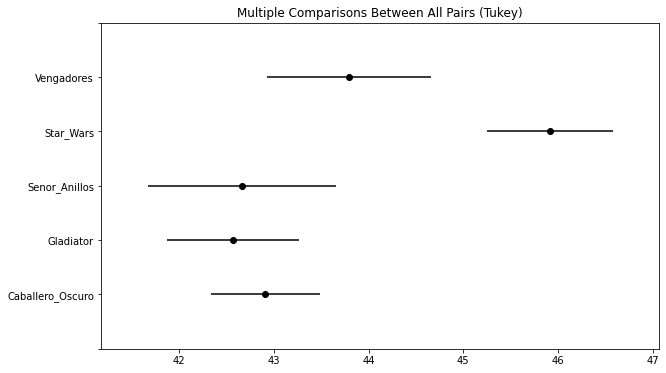

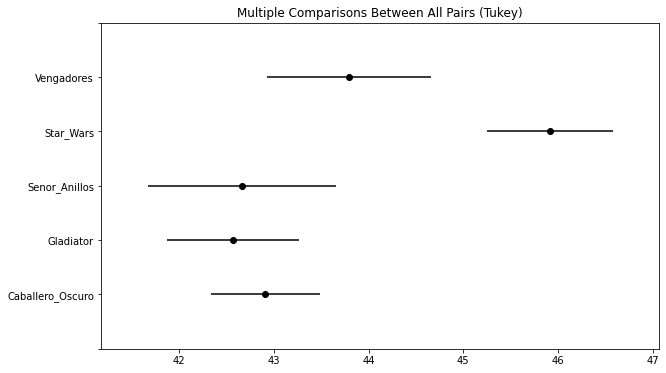

In [55]:
tukey.plot_simultaneous()